In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import time
import math
import collections

In [2]:
import torch
from torch import nn
from d2l import torch as d2l


print(torch.__version__)    # 1.7.0

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

1.7.1


# The example of GRU

In [3]:
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    
    def normal(shape):
        return torch.randn(size=shape, device=device)*0.01
    
    def three():
        return (normal((num_inputs, num_hiddens)), 
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device=device))
    
    W_xz, W_hz, b_z = three()
    W_xr, W_hr, b_r = three()
    W_xh, W_hh, b_h = three()
    
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    
    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]
    
    for param in params:
        param.requires_grad_(True)
    return params

In [7]:
def init_gru_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

def gru(inputs, state, params):
    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    
    for X in inputs:
        Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)
        R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)
        H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = H @ W_hq + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim = 0), (H, )

perplexity 1.1, 27967.9 tokens/sec on cuda:0
time traveller for so it will be convenient to speak of himwas e
traveller with a slight accession ofcheerfulness really thi
learning time:  174.61700415611267


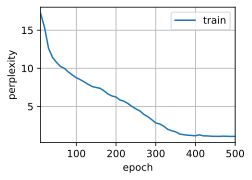

In [8]:
start_time = time.time()
vocab_size, num_hiddens, device = len(vocab), 256, d2l.try_gpu()
num_epochs, lr = 500, 1
model = d2l.RNNModelScratch(len(vocab), num_hiddens, device, get_params, init_gru_state, gru)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)
print("learning time: ", time.time()-start_time)

# The GRU with only a reset gate

In [17]:
def get_params1(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    
    def normal(shape):
        return torch.randn(size=shape, device=device)*0.01
    
    def three():
        return (normal((num_inputs, num_hiddens)), 
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device=device))
    
   
    W_xr, W_hr, b_r = three()
    W_xh, W_hh, b_h = three()
    
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    
    params =  [W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]
    
    for param in params:
        param.requires_grad_(True)
    return params

In [18]:
def init_gru_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

def gru1(inputs, state, params):
    W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    
    for X in inputs:
        Z = 1
        R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)
        H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = H @ W_hq + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim = 0), (H, )

perplexity 17.4, 39471.9 tokens/sec on cuda:0
time traveller                                                  
traveller                                                  
learning time:  131.93862795829773


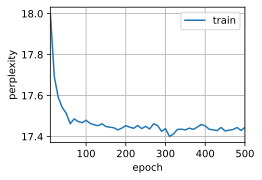

In [19]:
start_time1 = time.time()
model1 = d2l.RNNModelScratch(len(vocab), num_hiddens, device, get_params1, init_gru_state, gru1)
d2l.train_ch8(model1, train_iter, vocab, lr, num_epochs, device)
print("learning time: ", time.time()-start_time1)

# The GRU with only a update gate

In [21]:
def get_params2(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    
    def normal(shape):
        return torch.randn(size=shape, device=device)*0.01
    
    def three():
        return (normal((num_inputs, num_hiddens)), 
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device=device))
    
    W_xz, W_hz, b_z = three()
   
    W_xh, W_hh, b_h = three()
    
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    
    params = [W_xz, W_hz, b_z, W_xh, W_hh, b_h, W_hq, b_q]
    
    for param in params:
        param.requires_grad_(True)
    return params

In [25]:
def init_gru_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

def gru2(inputs, state, params):
    W_xz, W_hz, b_z, W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    
    for X in inputs:
        Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)
        R = 1
        H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = H @ W_hq + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim = 0), (H, )

perplexity 1.0, 35551.0 tokens/sec on cuda:0
time traveller with a slight accession ofcheerfulness really thi
traveller with a slight accession ofcheerfulness really thi
learning time:  143.7984938621521


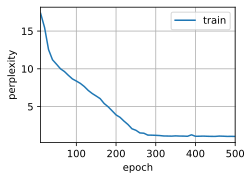

In [26]:
start_time = time.time()
vocab_size, num_hiddens, device = len(vocab), 256, d2l.try_gpu()
num_epochs, lr = 500, 1
model2 = d2l.RNNModelScratch(len(vocab), num_hiddens, device, get_params2, init_gru_state, gru2)
d2l.train_ch8(model2, train_iter, vocab, lr, num_epochs, device)
print("learning time: ", time.time()-start_time)

# The GRU with only gate

In [29]:
def get_params3(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    
    def normal(shape):
        return torch.randn(size=shape, device=device)*0.01
    
    def three():
        return (normal((num_inputs, num_hiddens)), 
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device=device))
    

    W_xh, W_hh, b_h = three()
    
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    
    for param in params:
        param.requires_grad_(True)
    return params

In [30]:
def init_gru_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

def gru3(inputs, state, params):
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    
    for X in inputs:
        Z = 1
        R = 1
        H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = H @ W_hq + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim = 0), (H, )

perplexity 17.4, 55308.3 tokens/sec on cuda:0
time traveller                                                  
traveller                                                  
learning time:  99.67911195755005


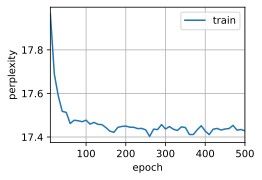

In [31]:
start_time = time.time()
vocab_size, num_hiddens, device = len(vocab), 256, d2l.try_gpu()
num_epochs, lr = 500, 1
model3 = d2l.RNNModelScratch(len(vocab), num_hiddens, device, get_params3, init_gru_state, gru3)
d2l.train_ch8(model3, train_iter, vocab, lr, num_epochs, device)
print("learning time: ", time.time()-start_time)